In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [242]:
profiles = pd.read_csv("CSV Files/customer_profiles.csv")
details = pd.read_csv("CSV Files/ad_details.csv")
events = pd.read_csv("CSV Files/ad_events.csv")

In [243]:
events = events.drop_duplicates(subset='customer', keep='first')

df = pd.merge(profiles, events, left_on='id', right_on='customer', how='outer')

df = df.drop('id', axis=1)

df.insert(0, 'id', df.pop('customer'))

df = df.fillna(df.median())

In [246]:
for col in df.drop(['id', 'age', 'income', 'became_member_on (year month day)', 'time'], axis=1).columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [247]:
scaler = StandardScaler()
data = scaler.fit_transform(df.drop(['id'], axis=1))

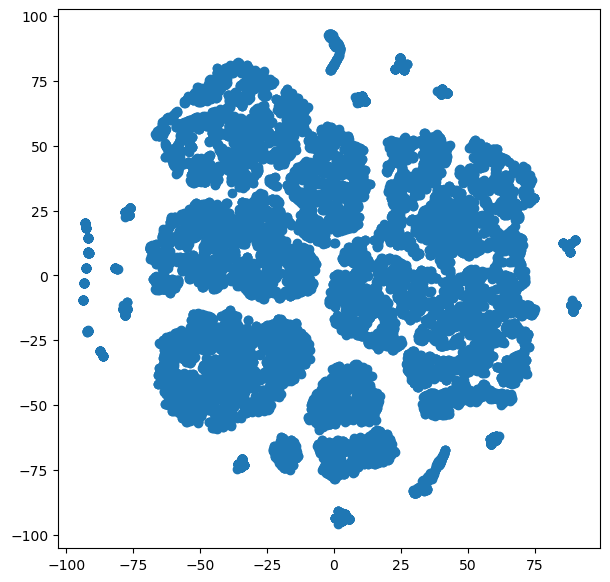

In [248]:
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [249]:
error = []
for n_clusters in range(1, 21):
    model = KMeans(init='k-means++',n_clusters=n_clusters,max_iter=1000,random_state=42)
    model.fit(data)
    error.append(model.inertia_)

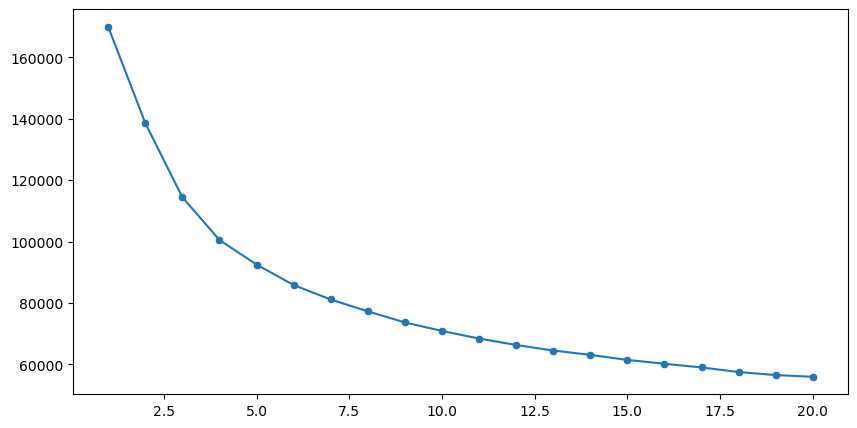

In [250]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 21), y=error)
sns.scatterplot(x=range(1, 21), y=error)
plt.show()

In [251]:
model = KMeans(init='k-means++', n_clusters=4)
segments = model.fit_predict(data)

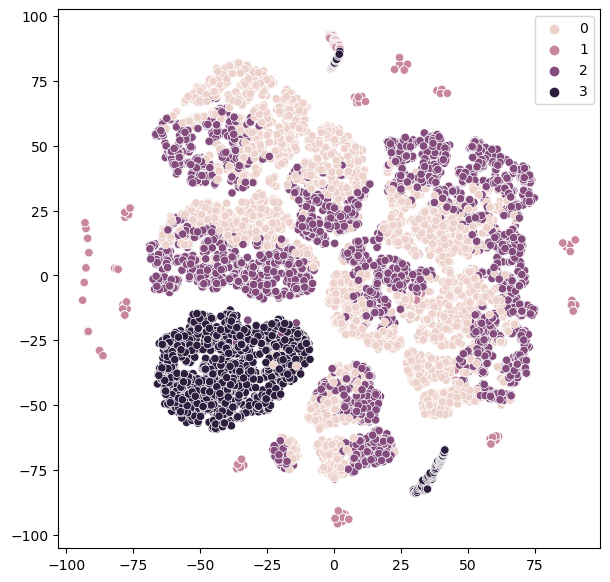

In [252]:
plt.figure(figsize=(7, 7))
sns.scatterplot(tsne_data[:, 0], tsne_data[:, 1], hue=segments)
plt.show()

In [253]:
labels = model.labels_

In [254]:
sc = metrics.silhouette_score(data, labels)
print("Silhouette Coefficient:%0.4f" % sc)

Silhouette Coefficient:0.2260
